In [6]:
import sys
sys.path.append('../')

import numpy as np
from scipy import ndimage

from skimage.filters import sobel_h
from skimage.filters import sobel_v
from scipy import stats


import os
import matplotlib
import matplotlib.pyplot as plt
import scienceplots
from tensorflow.python.client import device_lib

#plt.rcParams['figure.figsize'] = [10,10]

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16

from tensorflow.nn import depthwise_conv2d
from tensorflow.math import multiply, reduce_sum, reduce_mean,reduce_euclidean_norm, sin, cos, abs
from tensorflow import stack, concat, expand_dims

import tensorflow_probability as tfp

from utils.utils import *


plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '200'})

#### Experiment #1 : Energies accross all layers (all filters)

In [7]:
model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [ ]:
k = 10 # Top 10% highest l2-magnitude filters

 ============ LAYER 1 ==================
0 0
 ============ LAYER 2 ==================
0 1
 ============ LAYER 3 ==================
0 2
 ============ LAYER 4 ==================
0 3
 ============ LAYER 5 ==================
0 4
 ============ LAYER 6 ==================
0 5
 ============ LAYER 7 ==================
1 0
 ============ LAYER 8 ==================
1 1
 ============ LAYER 9 ==================
1 2
 ============ LAYER 10 ==================
1 3
 ============ LAYER 11 ==================
1 4
 ============ LAYER 12 ==================
1 5


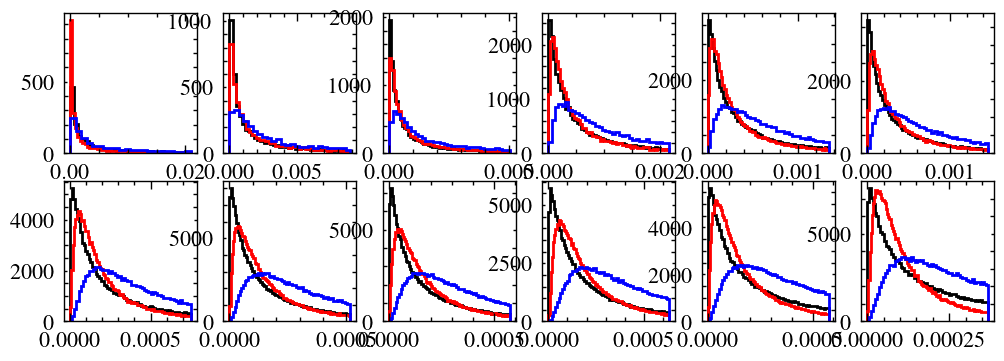

In [ ]:
conv_layers = []
for l in model.layers:
    if 'conv2d' in str(type(l)).lower():
        conv_layers.append(l)
e_beta = []
beta = []
min_beta = []
max_beta = []


plt.rcParams["ytick.major.size"] = 1
f, axs = plt.subplots(2, 6, figsize = (6,2))



for l_num in range(1, 13):
    #l_num = i+1
    print(f" ============ LAYER {l_num} ==================")

    filters = get_filter(model, l_num)
    s, a = getSymAntiSymTF(filters)
    a_energy = reduce_euclidean_norm(a, axis=[0,1])**2
    s_energy = reduce_euclidean_norm(s, axis=[0,1])**2
    total_energy  = reduce_euclidean_norm(filters, axis=[0,1])**2

    r = np.min([np.percentile(tf.reshape(s_energy, (1,-1)), 90 ), np.percentile(tf.reshape(a_energy, (1,-1)), 90 ), np.percentile(tf.reshape(total_energy, (1,-1)), 90 )])

    axs[(l_num-1)//6, ((l_num-1)%6)].stairs(*np.histogram(tf.reshape(s_energy, (1,-1)), bins= 'auto' , density=True, range=(0., r)))
    axs[(l_num-1)//6, ((l_num-1)%6)].stairs(*np.histogram(tf.reshape(a_energy, (1,-1)), bins='auto' , density=True, range=(0., r)))
    axs[(l_num-1)//6, ((l_num-1)%6)].stairs(*np.histogram(tf.reshape(total_energy, (1,-1)), bins='auto' , density=True,  range=(0., r)))

    
    #axs[(l_num-1)//6, ((l_num-1)%6)].hist(tf.reshape(s_energy, (1,-1)), bins='sqrt' , density=False)

    print((l_num-1)//6 , ((l_num-1)%6))








In [ ]:
#estimate gamma distribution parameters using method of moments

m = tf.math.reduce_mean(a_energy)
v = tf.math.reduce_variance(a_energy)

